## Classifier of research articles abstract by field
The goal of this notebook is to introduce an proof of concept from an automated tagging text data system. The proposed code implements a classifier loading the data scraped from arxiv.org an site of research articles. The Libraries used are pandas, numpy and scikit-learn. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Step 1
First we load the data scraped by site arxiv.org that contains the folowing structure of columns:
- abstract
    - contains the article abstract 
- field
    - the field obtained into page of the article in arxiv site
- search_word
    - the specific keyword used to search the articles
- title 
    - contains the article title

In [2]:
df = pd.read_csv('arxiv_fields_dataset.csv')

### Step 2
We will analyze the distribution of the data to prepare the data for training and test set.

#### Step 2.1
This step is for make an representation of the classes represented by keywords transform this in a number label tagging this is the input format. To do this I create a dict representation and maping the serie of search_words.

In [3]:
keywords = ['recurrent neural networks', 'convolutional neural networks', 'natural language processing', 'reinforcement learning', 'unsupervised learning', 'clustering']
category = {}
for index, keyword in enumerate(keywords):
    category[keyword] = index

In [4]:
df['label'] = df['search_word'].map(category)

In [5]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

Now I group the dataset by search_word field. The decision of choose this field is because the search word is a human classify that previously has an intent of read articles about the specific theme, so the acuracy of classifiers is aligned with the search person propose.

In [6]:
grouped = df.groupby('search_word').count().label

In the output above we can see that the classes are balanced that is a good scenario to build a model from this dataset.

In [7]:
grouped

search_word
clustering                       37
convolutional neural networks    40
natural language processing      40
recurrent neural networks        39
reinforcement learning           41
unsupervised learning            43
Name: label, dtype: int64

To easily view we plot a bar graph to show the distribution of the classes. Is important observe this because it can impact in the model performance, unbalanced data can cause more erros and low precision in a model training.

In [8]:
x, tag = grouped, grouped.index

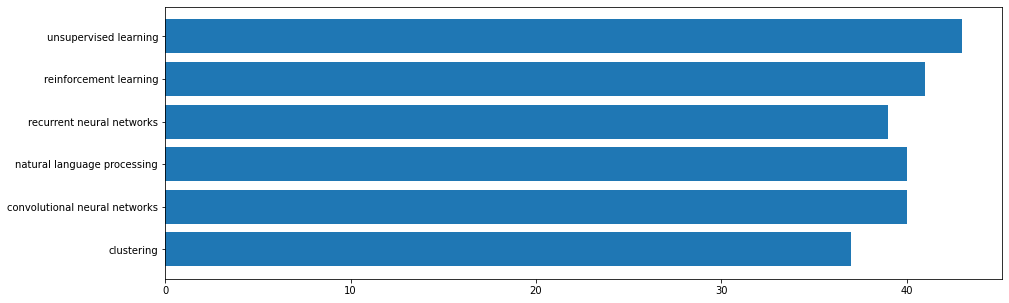

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.barh(tag, x)
plt.show()

## Step 3
This step I do a split of the train-test dataset where has 80% to train set and 20% to test set.

In [10]:
X = df['abstract']
y = df['label']
cv = CountVectorizer()
X = cv.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

## Step 4
In this step we train and evaluate the classifier. I choose the RandomForest because the simple problem amd because the size of the dataset, and but this produce great result In this case. We can view the result of the classifier on confusion matrix above. We can observe that in any classes we have high accuracy and this can say for us that model can overfiting.

In [11]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.78      0.78      0.78         9
           2       1.00      0.78      0.88         9
           3       1.00      0.82      0.90        11
           4       0.75      0.86      0.80         7
           5       0.70      1.00      0.82         7

    accuracy                           0.83        48
   macro avg       0.84      0.84      0.83        48
weighted avg       0.86      0.83      0.84        48



### Step 5
We will predict with real cases out of the dataset of training.

In [12]:
text = """In this work, we propose and evaluate a new reinforcement learning method, COMPact Experience Replay (COMPER), which uses temporal difference learning with predicted target values based on recurrence over sets of similar transitions, and a new approach for experience replay based on two transitions memories. Our objective is to reduce the required number of experiences to agent training regarding the total accumulated rewarding in the long run. Its relevance to reinforcement learning is related to the small number of observations that it needs to achieve results similar to that obtained by relevant methods in the literature, that generally demand millions of video frames to train an agent on the Atari 2600 games. We report detailed results from five training trials of COMPER for just 100,000 frames and about 25,000 iterations with a small experiences memory on eight challenging games of Arcade Learning Environment (ALE). We also present results for a DQN agent with the same experimental protocol on the same games set as the baseline. To verify the performance of COMPER on approximating a good policy from a smaller number of observations, we also compare its results with that obtained from millions of frames presented on the benchmark of ALE."""
text2 = """"Clustering is a fundamental primitive in unsupervised learning which gives rise to a rich class of computationally-challenging inference tasks. In this work, we focus on the canonical task of clustering d-dimensional Gaussian mixtures with unknown (and possibly degenerate) covariance. Recent works (Ghosh et al.\ '20; Mao, Wein '21; Davis, Diaz, Wang '21) have established lower bounds against the class of low-degree polynomial methods and the sum-of-squares (SoS) hierarchy for recovering certain hidden structures planted in Gaussian clustering instances. Prior work on many similar inference tasks portends that such lower bounds strongly suggest the presence of an inherent statistical-to-computational gap for clustering, that is, a parameter regime where the clustering task is \textit{statistically} possible but no \textit{polynomial-time} algorithm succeeds.One special case of the clustering task we consider is equivalent to the problem of finding a planted hypercube vector in an otherwise random subspace. We show that, perhaps surprisingly, this particular clustering model \textit{does not exhibit} a statistical-to-computational gap, even though the aforementioned low-degree and SoS lower bounds continue to apply in this case. To achieve this, we give a polynomial-time algorithm based on the Lenstra--Lenstra--Lovasz lattice basis reduction method which achieves the statistically-optimal sample complexity of d+1 samples. This result extends the class of problems whose conjectured statistical-to-computational gaps can be "closed" by "brittle" polynomial-time algorithms, highlighting the crucial but subtle role of noise in the onset of statistical-to-computational gaps."""

In [13]:
text_array = cv.transform([text,text2]).toarray()
result = classifier.predict(text_array)

The results is a text with classifier 3 and 5 and that is good this texts are really about this theme searched and analised previously.

In [14]:
print(result)

[3 5]


In [15]:
category

{'recurrent neural networks': 0,
 'convolutional neural networks': 1,
 'natural language processing': 2,
 'reinforcement learning': 3,
 'unsupervised learning': 4,
 'clustering': 5}